In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

# import performanceanalytics.statistics as pas
# import quantstats as qs

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_prices = pd.read_csv('stock_prices.csv',index_col='date',parse_dates=True)
df_prices

,ADN,AEE,AEP,AES,AGR,ALCE,ALE,AMPS,ARIS,ARTNA,...,TVE,UGI,UTL,VGAS,VIA,VST,WEC,WTRG,XEL,YORW
date,,,,,,,,,,,,,,,,,,,,,
2023-03-01,52.200001,77.833527,82.796310,23.525192,36.142548,10.200,58.352753,6.63,12.934539,53.065838,...,20.497381,34.530087,51.602707,10.200,29.049999,21.039583,82.554329,41.228195,60.526001,41.644726
2023-03-02,51.599998,79.110909,84.359062,23.534746,36.787613,10.205,58.724483,6.64,13.258378,53.962120,...,20.390877,34.753704,52.164341,9.080,28.400000,20.632555,83.937073,41.170086,61.549595,42.036217
2023-03-03,53.400002,80.417099,85.413658,23.974112,37.280895,10.210,59.334507,6.96,13.115508,53.923149,...,20.671663,35.033226,52.755028,8.990,27.350000,20.748846,85.434242,40.685844,62.276634,42.496220
2023-03-06,52.200001,80.532349,85.682106,23.878599,37.413712,10.220,58.915123,7.14,12.610699,53.747795,...,20.671663,34.576675,52.144970,9.000,25.850000,23.627132,85.672638,40.966709,62.228806,42.643028
2023-03-07,51.599998,79.178139,84.972641,23.410582,36.759155,10.230,57.799915,7.31,10.667661,53.708828,...,20.661982,34.353054,51.931942,8.896,24.750000,25.691357,84.747643,40.191921,60.851261,44.365585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,4.980000,74.709999,86.370003,17.201746,37.020000,0.317,59.959999,3.68,14.660000,34.889999,...,21.559969,26.000000,50.799999,4.340,10.900000,70.459999,81.822365,36.540001,55.330002,35.529999
2024-04-25,4.914000,74.760002,86.860001,16.964069,36.549999,0.330,59.570000,3.60,14.650000,34.520000,...,21.480484,25.730000,50.490002,4.290,10.880000,72.480003,82.000603,36.570000,55.009998,35.369999
2024-04-26,4.548000,73.660004,85.260002,17.043295,36.380001,0.344,59.020000,3.62,14.810000,34.500000,...,21.401001,25.379999,49.939999,4.600,10.880000,72.699997,80.693504,36.090000,53.959999,35.369999


In [3]:
df_train = df_prices[df_prices.index < '2023-12-31']
df_train

,ADN,AEE,AEP,AES,AGR,ALCE,ALE,AMPS,ARIS,ARTNA,...,TVE,UGI,UTL,VGAS,VIA,VST,WEC,WTRG,XEL,YORW
date,,,,,,,,,,,,,,,,,,,,,
2023-03-01,52.200001,77.833527,82.796310,23.525192,36.142548,10.200,58.352753,6.63,12.934539,53.065838,...,20.497381,34.530087,51.602707,10.200,29.049999,21.039583,82.554329,41.228195,60.526001,41.644726
2023-03-02,51.599998,79.110909,84.359062,23.534746,36.787613,10.205,58.724483,6.64,13.258378,53.962120,...,20.390877,34.753704,52.164341,9.080,28.400000,20.632555,83.937073,41.170086,61.549595,42.036217
2023-03-03,53.400002,80.417099,85.413658,23.974112,37.280895,10.210,59.334507,6.96,13.115508,53.923149,...,20.671663,35.033226,52.755028,8.990,27.350000,20.748846,85.434242,40.685844,62.276634,42.496220
2023-03-06,52.200001,80.532349,85.682106,23.878599,37.413712,10.220,58.915123,7.14,12.610699,53.747795,...,20.671663,34.576675,52.144970,9.000,25.850000,23.627132,85.672638,40.966709,62.228806,42.643028
2023-03-07,51.599998,79.178139,84.972641,23.410582,36.759155,10.230,57.799915,7.31,10.667661,53.708828,...,20.661982,34.353054,51.931942,8.896,24.750000,25.691357,84.747643,40.191921,60.851261,44.365585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,6.354000,71.414375,79.465294,18.722160,31.887262,5.000,60.869202,6.64,8.305835,42.341656,...,21.622562,24.148851,51.537193,2.230,9.390000,37.889172,81.254288,36.819717,60.886734,38.234615
2023-12-26,6.099000,71.117096,79.811317,18.977016,32.133762,2.100,60.928459,6.88,8.454685,42.530109,...,21.671930,24.493694,52.221313,2.200,9.740000,38.068550,81.940056,37.097301,61.073143,39.065159
2023-12-27,6.972000,71.047737,79.890396,18.898602,31.946423,1.780,60.582783,6.92,8.474531,42.292065,...,21.849648,24.503548,52.578251,2.200,9.440000,38.247932,81.753914,37.077480,60.885166,39.114597


In [4]:
stock_1 = df_prices.columns[0]
stock_2 = df_prices.columns[1]

df_pairs = df_prices[[stock_1, stock_2]]

# Convert index to datetime
df_pairs.index = pd.to_datetime(df_prices.index)
df_pairs

,ADN,AEE
date,,
2023-03-01,52.200001,77.833527
2023-03-02,51.599998,79.110909
2023-03-03,53.400002,80.417099
2023-03-06,52.200001,80.532349
2023-03-07,51.599998,79.178139
...,...,...
2024-04-24,4.980000,74.709999
2024-04-25,4.914000,74.760002
2024-04-26,4.548000,73.660004


In [5]:
model = LinearRegression().fit(np.log(df_train[[stock_1]]), np.log(df_train[[stock_2]]))
hedge_ratio = float(model.coef_)
df_pairs['spread'] = np.log(df_pairs[stock_1]) - hedge_ratio * np.log(df_pairs[stock_2])
# df_pairs['spread'] = df_pairs[stock_1] - df_pairs[stock_2]
df_pairs['M'] = df_pairs.index.strftime('%Y-%m')
df_pairs

,ADN,AEE,spread,M
date,,,,
2023-03-01,52.200001,77.833527,3.600282,2023-03
2023-03-02,51.599998,79.110909,3.587395,2023-03
2023-03-03,53.400002,80.417099,3.620349,2023-03
2023-03-06,52.200001,80.532349,3.597505,2023-03
2023-03-07,51.599998,79.178139,3.587325,2023-03
...,...,...,...,...
2024-04-24,4.980000,74.709999,1.253966,2024-04
2024-04-25,4.914000,74.760002,1.240570,2024-04
2024-04-26,4.548000,73.660004,1.164377,2024-04


In [6]:
df_monthly = pd.DataFrame()
# Calculate the monthly mean of the 'spread' column for each month
df_monthly['mean'] = df_pairs['spread'].resample('M').mean()
df_monthly['std'] = df_pairs['spread'].resample('M').std()

df_monthly['rolling_mean'] = df_monthly['mean'].shift(1).rolling(window=2).mean()
df_monthly['rolling_std'] = df_monthly['std'].shift(1).rolling(window=2).mean()

df_monthly['M'] = df_monthly.index.strftime('%Y-%m')

df_monthly

,mean,std,rolling_mean,rolling_std,M
date,,,,,
2023-03-31,3.337739,0.184450,NaN,NaN,2023-03
2023-04-30,2.919708,0.153153,NaN,NaN,2023-04
2023-05-31,2.840213,0.160396,3.128724,0.168801,2023-05
2023-06-30,2.672334,0.142579,2.879961,0.156774,2023-06
2023-07-31,2.825543,0.164226,2.756273,0.151487,2023-07
2023-08-31,2.637814,0.160707,2.748938,0.153402,2023-08
2023-09-30,2.296608,0.107201,2.731678,0.162466,2023-09
2023-10-31,2.108573,0.088984,2.467211,0.133954,2023-10
2023-11-30,2.263947,0.093040,2.202591,0.098093,2023-11


In [7]:
Std = 1.5

df_calculate_std_mean = pd.merge(df_pairs, df_monthly[['rolling_mean','rolling_std','M']], on='M', how='left')
df_calculate_std_mean.index = df_pairs.index

df_calculate_std_mean['up_mean_std'] = df_calculate_std_mean['rolling_mean'] + Std * df_calculate_std_mean['rolling_std']
df_calculate_std_mean['down_mean_std'] = df_calculate_std_mean['rolling_mean'] - Std * df_calculate_std_mean['rolling_std']

# df_calculate_std_mean.dropna(inplace=True)

df_calculate_std_mean

,ADN,AEE,spread,M,rolling_mean,rolling_std,up_mean_std,down_mean_std
date,,,,,,,,
2023-03-01,52.200001,77.833527,3.600282,2023-03,NaN,NaN,NaN,NaN
2023-03-02,51.599998,79.110909,3.587395,2023-03,NaN,NaN,NaN,NaN
2023-03-03,53.400002,80.417099,3.620349,2023-03,NaN,NaN,NaN,NaN
2023-03-06,52.200001,80.532349,3.597505,2023-03,NaN,NaN,NaN,NaN
2023-03-07,51.599998,79.178139,3.587325,2023-03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-24,4.980000,74.709999,1.253966,2024-04,1.361811,0.092436,1.500465,1.223157
2024-04-25,4.914000,74.760002,1.240570,2024-04,1.361811,0.092436,1.500465,1.223157
2024-04-26,4.548000,73.660004,1.164377,2024-04,1.361811,0.092436,1.500465,1.223157


In [8]:
df_signal = df_calculate_std_mean.copy()

spread = np.array(df_signal['spread'])
mean = np.array(df_signal['rolling_mean'])
up_mean_std = np.array(df_signal['up_mean_std'])
down_mean_std = np.array(df_signal['down_mean_std'])

# Initialize 'Hold' with 0s
hold = np.zeros(len(spread))  

# Pre-calculate conditions 
spread_above_up_mean_std = spread > up_mean_std
spread_below_down_mean_std = spread < down_mean_std
mean_crossing_up = (spread < mean) & (np.roll(spread, 1) > mean)
mean_crossing_down = (spread > mean) & (np.roll(spread, 1) < mean)

# Iterate through the array
for i in range(1, len(spread)):
    previous_hold = hold[i - 1]

    if spread_above_up_mean_std[i] and previous_hold == 0:
        hold[i] = 1
    elif spread_below_down_mean_std[i] and previous_hold == 0:
        hold[i] = -1
    elif (mean_crossing_up[i] or mean_crossing_down[i]) and previous_hold != 0:
        hold[i] = 0
    else:
        # Carry forward the 'Hold' value
        hold[i] = previous_hold

df_signal['Hold'] = hold
df_signal

,ADN,AEE,spread,M,rolling_mean,rolling_std,up_mean_std,down_mean_std,Hold
date,,,,,,,,,
2023-03-01,52.200001,77.833527,3.600282,2023-03,NaN,NaN,NaN,NaN,0.0
2023-03-02,51.599998,79.110909,3.587395,2023-03,NaN,NaN,NaN,NaN,0.0
2023-03-03,53.400002,80.417099,3.620349,2023-03,NaN,NaN,NaN,NaN,0.0
2023-03-06,52.200001,80.532349,3.597505,2023-03,NaN,NaN,NaN,NaN,0.0
2023-03-07,51.599998,79.178139,3.587325,2023-03,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
2024-04-24,4.980000,74.709999,1.253966,2024-04,1.361811,0.092436,1.500465,1.223157,0.0
2024-04-25,4.914000,74.760002,1.240570,2024-04,1.361811,0.092436,1.500465,1.223157,0.0
2024-04-26,4.548000,73.660004,1.164377,2024-04,1.361811,0.092436,1.500465,1.223157,-1.0


In [9]:
# Initial parameters (examples, modify as needed)
initial_cash = 10000  # Example initial cash value
cost_rate = 5 / 10000  # Example commission rate

df_back_test = df_signal.copy()

# Initial data
n = len(df_back_test['spread'])  
stock_1_prices = np.array(df_back_test[stock_1])  
stock_2_prices = np.array(df_back_test[stock_2])  

hold_signals = np.array(df_back_test['Hold'])

# Initialize arrays to store calculations
values = np.zeros((n, 2))
positions = np.zeros((n, 2))
price_changes = np.zeros((n, 2))
profLoss = np.zeros((n, 2))
commissions = np.zeros((n, 2))
split = np.zeros((n, 2))
dividends = np.zeros((n, 2))
net_income = np.zeros((n, 2))
total_value = np.zeros(n)


values[0] = initial_cash, initial_cash  # Set initial values


for i in range(1, n):
    # Value calculation
    if hold_signals[i-1] == 0 and abs(hold_signals[i]) ==1 :
        values[i] = total_value[i-1]/2
    else:
        values[i] = values[i-1] + net_income[i-1]
    
    
    # Position calculation
    if hold_signals[i-1] == 0 and abs(hold_signals[i]) == 1:
        positions[i, 0] = values[i-1, 0] / stock_1_prices[i] 
        positions[i, 1] = values[i-1, 1] / stock_2_prices[i]
    elif abs(hold_signals[i-1]) == 1 and hold_signals[i] == 0:
        positions[i] = 0, 0
    else:
        positions[i] = positions[i-1]
    
    # Price change calculation
    price_changes[i, 0] = stock_1_prices[i] - stock_1_prices[i-1] if hold_signals[i] in [1] else stock_1_prices[i-1] - stock_1_prices[i]
    price_changes[i, 1] = stock_2_prices[i] - stock_2_prices[i-1] if hold_signals[i] in [-1] else stock_2_prices[i-1] - stock_2_prices[i]
    
    # Profit and loss calculation
    if hold_signals[i-1] == hold_signals[i]:
        profLoss[i] = positions[i] * price_changes[i]
    else:
        profLoss[i] = 0, 0
    
    # Commission calculation
    commissions[i, 0] = abs(positions[i, 0] - positions[i-1, 0]) * cost_rate * stock_1_prices[i]
    commissions[i, 1] = abs(positions[i, 1] - positions[i-1, 1]) * cost_rate * stock_2_prices[i]

    
    # Net income
    net_income[i] = profLoss[i] - commissions[i] + dividends[i]

    total_value[i] = values[i].sum()

# Compute total value and returns
returns = np.zeros(n)
returns[1:] = total_value[1:] / total_value[:-1] - 1

df_back_test[['value_1','value_2']] = values
df_back_test[['position_1','position_2']] = positions
df_back_test[['price_change_1','price_change_2']] = price_changes
df_back_test[['profLoss_1','profLoss_2']] = profLoss
df_back_test[['commission_1','commission_2']] = commissions
df_back_test[['dividend_1','dividend_2']] = dividends
df_back_test[['net_income_1','net_income_2']] = net_income


df_back_test['total_value'] = total_value
df_back_test['return'] = returns

df_back_test.dropna(inplace=True)

# df_back_test = df_back_test[[return']]

df_back_test.rename(columns={"return": f"{stock_1}_{stock_2}"}, inplace=True)
df_back_test

,ADN,AEE,spread,M,rolling_mean,rolling_std,up_mean_std,down_mean_std,Hold,value_1,...,profLoss_1,profLoss_2,commission_1,commission_2,dividend_1,dividend_2,net_income_1,net_income_2,total_value,ADN_AEE
date,,,,,,,,,,,,,,,,,,,,,
2023-05-01,22.326000,86.739586,2.742124,2023-05,3.128724,0.168801,3.381925,2.875522,-1.0,10000.000000,...,0.000000,0.000000,5.000000,5.000000,0.0,0.0,-5.000000,-5.000000,20000.000000,0.000000
2023-05-02,21.452999,86.236366,2.702711,2023-05,3.128724,0.168801,3.381925,2.875522,-1.0,9995.000000,...,391.024407,-58.014988,0.000000,0.000000,0.0,0.0,391.024407,-58.014988,19990.000000,-0.000500
2023-05-03,19.569000,85.791199,2.611215,2023-05,3.128724,0.168801,3.381925,2.875522,-1.0,10386.024407,...,843.858664,-51.322304,0.000000,0.000000,0.0,0.0,843.858664,-51.322304,20323.009419,0.016659
2023-05-04,18.497999,86.855721,2.553926,2023-05,3.128724,0.168801,3.381925,2.875522,-1.0,11229.883070,...,479.710222,122.726178,0.000000,0.000000,0.0,0.0,479.710222,122.726178,21115.545778,0.038997
2023-05-05,19.500000,87.552498,2.606027,2023-05,3.128724,0.168801,3.381925,2.875522,-1.0,11709.593293,...,-448.804443,80.329798,0.000000,0.000000,0.0,0.0,-448.804443,80.329798,21717.982179,0.028530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,4.980000,74.709999,1.253966,2024-04,1.361811,0.092436,1.500465,1.223157,0.0,12644.689905,...,0.000000,-0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,20510.043504,0.000000
2024-04-25,4.914000,74.760002,1.240570,2024-04,1.361811,0.092436,1.500465,1.223157,0.0,12644.689905,...,0.000000,-0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,20510.043504,0.000000
2024-04-26,4.548000,73.660004,1.164377,2024-04,1.361811,0.092436,1.500465,1.223157,-1.0,10255.021752,...,0.000000,0.000000,6.322345,3.932677,0.0,0.0,-6.322345,-3.932677,20510.043504,0.000000


In [10]:
df_back_test.to_csv('back_test_result.csv')

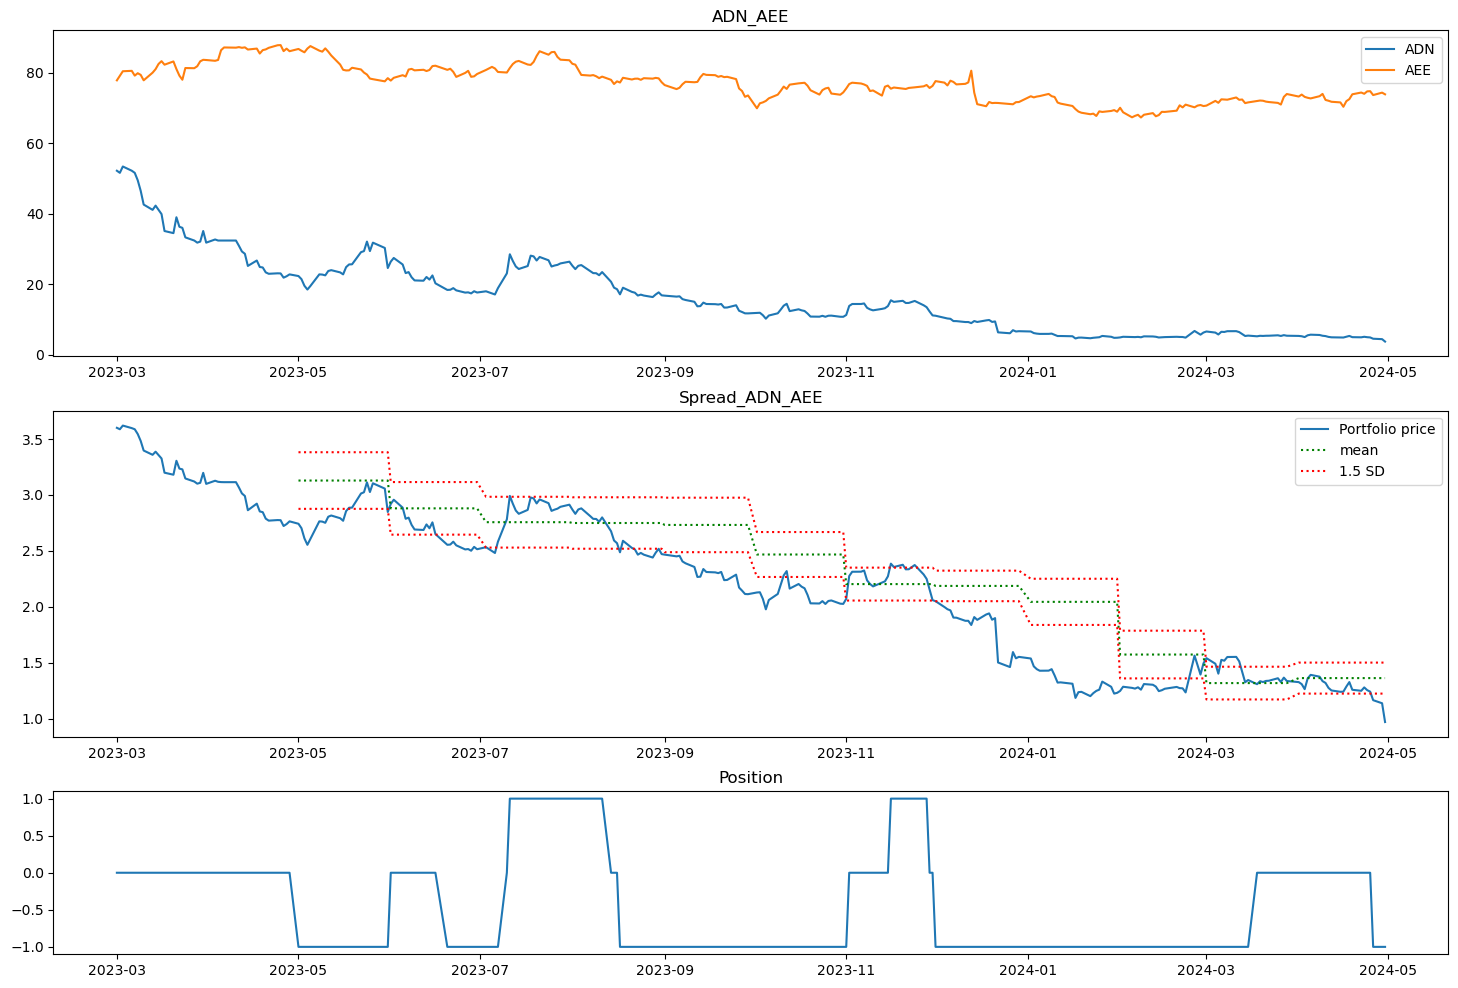

In [11]:
def plot_figure(df_plot):
    # plot portfolio price and positions
    f, (a1, a2, a3) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [4,4, 2]})
    f.set_figwidth(18)
    f.set_figheight(12)

    a1.set_title(f'{stock_1}_{stock_2}')
    a1.plot(df_plot[stock_1], label=stock_1)
    a1.plot(df_plot[stock_2], label=stock_2)
    a1.legend(loc='upper right')
    # a1.grid()

    a2.plot(df_plot['spread'], label='Portfolio price')
    a2.set_title(f'Spread_{stock_1}_{stock_2}')
    a2.plot(df_plot['rolling_mean'], color='g', linestyle='dotted', label='mean')
    a2.plot(df_plot['up_mean_std'], color='r', linestyle='dotted', label=f'{Std} SD')
    a2.plot(df_plot['down_mean_std'], color='r', linestyle='dotted')
    a2.legend(loc='upper right')
    # a2.grid()

    a3.plot(df_plot['Hold'])
    a3.set_title('Position')
    # a3.grid()

plot_figure(df_signal)

In [12]:
# def plot_cumulative_return(df):
#     # Plot the cumulative return
#     plt.figure(figsize=(10, 6))
#     plt.plot(df['cumulative_return'])
#     plt.title('Cumulative Return')
#     plt.xlabel('Time')
#     plt.ylabel('Cumulative Return')
#     plt.grid(True)
#     plt.show()

# plot_cumulative_return(df_back_test)

In [13]:
# qs.reports.html(df_back_test['return'], "SPY")